# Twitter analysis 

<center><img src="https://techcrunch.com/wp-content/uploads/2017/12/gettyimages-876768474.jpg?w=730&crop=1"></center>

Analyze the sentiment of tweets on some query search, your model should learn from [this dataset](https://www.kaggle.com/kazanova/sentiment140)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('../dataset/training.1600000.processed.noemoticon.csv',encoding='latin',sep=',')
dataset

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
dataset.columns=['target','ids','date','flag','user','text']


In [4]:
X = dataset['text']
X

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1599999, dtype: object

In [5]:
target = dataset['target']
target.value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [6]:
def sentiment(polarity):
    if polarity == 3 or polarity == 4 or polarity == 2:
        return 'positive'
    else:
        return 'negative'
target = target.apply(sentiment)
target.value_counts()

positive    800000
negative    799999
Name: target, dtype: int64

In [7]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [8]:
import re
def prepare_text(text):
    
    text = str(text).strip().lower()
    text = re.sub(r'[\W\d_]',' ',text)
    words = text.split()
    words = [lemm.lemmatize(word,pos='v') for word in words]
    joined = ' '.join(words)
    
    return joined.strip()

In [9]:
X = X.apply(prepare_text)

In [22]:
X

0          be upset that he can t update his facebook by ...
1          kenichan i dive many time for the ball manage ...
2              my whole body feel itchy and like its on fire
3          nationwideclass no it s not behave at all i m ...
4                                kwesidei not the whole crew
                                 ...                        
1599994    just wake up have no school be the best feel ever
1599995    thewdb com very cool to hear old walt intervie...
1599996    be you ready for your mojo makeover ask me for...
1599997    happy th birthday to my boo of alll time tupac...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.01)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=100000)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
x_train

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

clf = MultinomialNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.76      0.76      0.76      8090
    positive       0.75      0.75      0.75      7910

    accuracy                           0.75     16000
   macro avg       0.75      0.75      0.75     16000
weighted avg       0.75      0.75      0.75     16000



,0,1
0,6110,1980
1,1947,5963


In [13]:
from sklearn.svm import LinearSVC
clf3 = LinearSVC()
clf3.fit(x_train,y_train)
y_predicted = clf3.predict(x_test)
print(classification_report(y_test, y_predicted))
pd.DataFrame(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

    negative       0.78      0.74      0.76      8090
    positive       0.75      0.79      0.77      7910

    accuracy                           0.77     16000
   macro avg       0.77      0.77      0.77     16000
weighted avg       0.77      0.77      0.77     16000



,0,1
0,6023,2067
1,1691,6219


In [14]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(class_weight='balanced')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.68      0.73      8090
    positive       0.71      0.82      0.76      7910

    accuracy                           0.75     16000
   macro avg       0.75      0.75      0.75     16000
weighted avg       0.76      0.75      0.75     16000



In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
print(classification_report(y_test, y_predicted))
pd.DataFrame(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71      7920
           4       0.71      0.82      0.76      8080

    accuracy                           0.74     16000
   macro avg       0.74      0.74      0.74     16000
weighted avg       0.74      0.74      0.74     16000



,0,1
0,5188,2732
1,1462,6618


# It's obvoious that LinearSVC is the best one 

## Now let's scrap Twetter and classifiy scrapped tweets

In [59]:
query = input('What do you want to search for ? : ')
#list_of_tweets = query_tweets(query, 1)

# #print the retrieved tweets to the screen:
# for tweet in query_tweets("Trump OR Clinton", 10):
#     print(tweet)

#Or save the retrieved tweets to file:
file = open('output.txt','w+')
for tweet in query_tweets(query, 1):
    file.write(str(tweet))
file.close()
print('Saved..')


What do you want to search for ? : Egypt


INFO: queries: ['Egypt since:2006-03-21 until:2006-12-04', 'Egypt since:2006-12-04 until:2007-08-19', 'Egypt since:2007-08-19 until:2008-05-03', 'Egypt since:2008-05-03 until:2009-01-17', 'Egypt since:2009-01-17 until:2009-10-02', 'Egypt since:2009-10-02 until:2010-06-17', 'Egypt since:2010-06-17 until:2011-03-02', 'Egypt since:2011-03-02 until:2011-11-16', 'Egypt since:2011-11-16 until:2012-07-31', 'Egypt since:2012-07-31 until:2013-04-15', 'Egypt since:2013-04-15 until:2013-12-29', 'Egypt since:2013-12-29 until:2014-09-14', 'Egypt since:2014-09-14 until:2015-05-30', 'Egypt since:2015-05-30 until:2016-02-12', 'Egypt since:2016-02-12 until:2016-10-27', 'Egypt since:2016-10-27 until:2017-07-13', 'Egypt since:2017-07-13 until:2018-03-28', 'Egypt since:2018-03-28 until:2018-12-11', 'Egypt since:2018-12-11 until:2019-08-26', 'Egypt since:2019-08-26 until:2020-05-11']
INFO: Querying Egypt since:2007-08-19 until:2008-05-03
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertic

Saved..


In [72]:
import datetime
for tweet in query_tweets("Cairo", limit=10)[:5]:
    print(str(getattr(tweet, 'text')))

INFO: queries: ['Cairo since:2006-03-21 until:2006-12-04', 'Cairo since:2006-12-04 until:2007-08-19', 'Cairo since:2007-08-19 until:2008-05-03', 'Cairo since:2008-05-03 until:2009-01-17', 'Cairo since:2009-01-17 until:2009-10-02', 'Cairo since:2009-10-02 until:2010-06-17', 'Cairo since:2010-06-17 until:2011-03-02', 'Cairo since:2011-03-02 until:2011-11-16', 'Cairo since:2011-11-16 until:2012-07-31', 'Cairo since:2012-07-31 until:2013-04-15', 'Cairo since:2013-04-15 until:2013-12-29', 'Cairo since:2013-12-29 until:2014-09-14', 'Cairo since:2014-09-14 until:2015-05-30', 'Cairo since:2015-05-30 until:2016-02-12', 'Cairo since:2016-02-12 until:2016-10-27', 'Cairo since:2016-10-27 until:2017-07-13', 'Cairo since:2017-07-13 until:2018-03-28', 'Cairo since:2018-03-28 until:2018-12-11', 'Cairo since:2018-12-11 until:2019-08-26', 'Cairo since:2019-08-26 until:2020-05-11']
INFO: Querying Cairo since:2006-12-04 until:2007-08-19
INFO: Querying Cairo since:2009-01-17 until:2009-10-02
INFO: Querying

INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 47.245.28.60:8118
INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 109.110.73.106:32479
INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 187.111.176.62:8080
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 123.200.20.242:58847
INFO: Retrying... (Attempts left: 42)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 79.175.57.77:

INFO: Using proxy 41.58.162.46:34794
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 46.145.177.161:40330
INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 115.178.25.130:43111
INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 79.135.240.254:60053
INFO: Retrying... (Attempts left: 3)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20since%3A2006-03-21%20until%3A2006-12-04&l=
INFO: Using proxy 169.159.190.25:53281
INFO: Retrying... (Attempts left: 2)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=Cairo%20

RT @writeawayuk: Cairo Jim in Search for Martenarten
Fairfax man returning from Yemen stranded in Cairo after landing on no-fly list: "I don't know any other way to ge... http://bit.ly/b0mJNJ
WOW Egypt to play two matches outside Cairo http://bit.ly/99EjxN
[latest news] Fairfax man returning from Yemen stranded in Cairo after landing on no-fly list: A ... http://bit.ly/bALcAY [Washington Post]
http://bit.ly/J8yzt Fairfax man returning from Yemen stranded in Cairo after landing on no-fly list: A Fairfax Cou... http://bit.ly/d5u8PL


In [25]:
import datetime as dt
from twitterscraper import query_tweets

query = input('What do you want to search for ? : ')

begin = dt.date(2020,4,11)
tweets = query_tweets(query,begindate=begin,limit=5)
df = pd.DataFrame(t.__dict__ for t in tweets)
text = df['text']


What do you want to search for ? : Football


INFO: queries: ['Football since:2020-04-11 until:2020-04-12', 'Football since:2020-04-12 until:2020-04-14', 'Football since:2020-04-14 until:2020-04-15', 'Football since:2020-04-15 until:2020-04-17', 'Football since:2020-04-17 until:2020-04-18', 'Football since:2020-04-18 until:2020-04-20', 'Football since:2020-04-20 until:2020-04-21', 'Football since:2020-04-21 until:2020-04-23', 'Football since:2020-04-23 until:2020-04-24', 'Football since:2020-04-24 until:2020-04-26', 'Football since:2020-04-26 until:2020-04-27', 'Football since:2020-04-27 until:2020-04-29', 'Football since:2020-04-29 until:2020-04-30', 'Football since:2020-04-30 until:2020-05-02', 'Football since:2020-05-02 until:2020-05-03', 'Football since:2020-05-03 until:2020-05-05', 'Football since:2020-05-05 until:2020-05-06', 'Football since:2020-05-06 until:2020-05-08', 'Football since:2020-05-08 until:2020-05-09', 'Football since:2020-05-09 until:2020-05-11']
INFO: Querying Football since:2020-04-21 until:2020-04-23
INFO: 

In [26]:
text = text.apply(prepare_text)

In [27]:
text

0      cristiano ronaldo le joueur de football de la ...
1      so you d take a pay cut even though none of th...
2                                    football season wya
3      nothing say quarantine like vodka drink on a n...
4                 this be awesome dawson congratulations
                             ...                        
374    for those of you who be mourn the think of hav...
375    football schedule be out go to start plan a tr...
376    i d rather not watch football than be a lions fan
377    yes sir great job brotha man declaretobegreath...
378    thanksgiving football on my loft tv will be amaze
Name: text, Length: 379, dtype: object

In [28]:
transformed = vectorizer.transform(text)

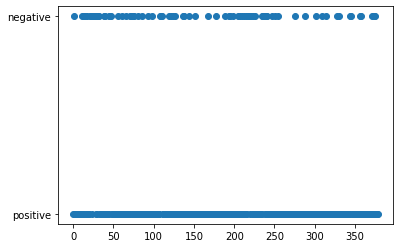

['positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'posit

In [33]:
import matplotlib.pyplot as plt
y_predicted = clf.predict(transformed)
plt.plot(y_predicted,'o')
plt.show()
print(y_predicted)

# Now let's try CountVectorizer instead of TFIDF Vectorizer and see the difference

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',max_features=100000,dtype=np.int16)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
x_train

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

new_clf = MultinomialNB()
new_clf.fit(x_train, y_train)

y_pred = new_clf.predict(x_test)

print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.linear_model import SGDClassifier

new_clf = SGDClassifier()

new_clf.fit(x_train, y_train)

y_pred = new_clf.predict(x_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC
new_clf3 = LinearSVC(class_weight='balanced')
new_clf3.fit(x_train,y_train)
y_predicted = new_clf3.predict(x_test)
print(classification_report(y_test, y_predicted))
pd.DataFrame(confusion_matrix(y_test, y_predicted))

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
print(classification_report(y_test, y_predicted))
pd.DataFrame(confusion_matrix(y_test, y_predicted))

In [ ]:
query = "ENTER YOUR QUERY HERE"

# Start by building your sentiment analysis classifier

# Now time to collect some tweets based on the given query

for this task you can use multiple libraries, one of the very best ones is [twitterscraper by taspinar](https://github.com/taspinar/twitterscraper).

# Now apply the model you have trained on the scraped data

# Let's make some good looking charts 

use your favorite plotting library to plot the sentiment aggregation of the tweets you have gathered.

# Good job ! 

<center><img src="https://media.giphy.com/media/YRuFixSNWFVcXaxpmX/giphy.gif"></center>

# Now publish the notebook and show the world your work !